Importing The Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing The Dataset

In [2]:
data = pd.read_csv(r'C:\Users\Mayank\Downloads\S01 - Machine-Learning-A-Z-Codes-Datasets\Machine-Learning-A-Z-Codes-Datasets\Part 2 - Regression\Section 9 - Random Forest Regression\Python\Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [60]:
x= data.iloc[: , 1: -1].values  # independent variable
y=data.iloc[: , -1].values # dependent variable('Salary')

In [69]:
# x must be a 2D array because RandomForestRegressor expects multiple features (columns) even if you have only one feature.
# y (target variable) can be 1D.
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [63]:
x_train

array([[ 6],
       [ 1],
       [ 8],
       [ 3],
       [10],
       [ 5],
       [ 4],
       [ 7]])

In [64]:
y_train

array([ 150000,   45000,  300000,   60000, 1000000,  110000,   80000,
        200000])

Training the Random Forest Regression model on the whole dataset

In [89]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
regressor = RandomForestRegressor(n_estimators=10, random_state=42)

# Fit the model
regressor.fit(x, y)


RandomForestRegressor(n_estimators=10, random_state=42)

In [96]:
# x_test input for prediction 

# Predict using the model
y_pred = regressor.predict(x_test)
print(y_pred)
print(y_test)
print(y_train)

[405000.  53500.]
[500000  50000]
[ 150000   45000  300000   60000 1000000  110000   80000  200000]


In [76]:
print(y)



[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Scatter plot →x_grid, y
Predicted line → (x_grid, predicted_y)

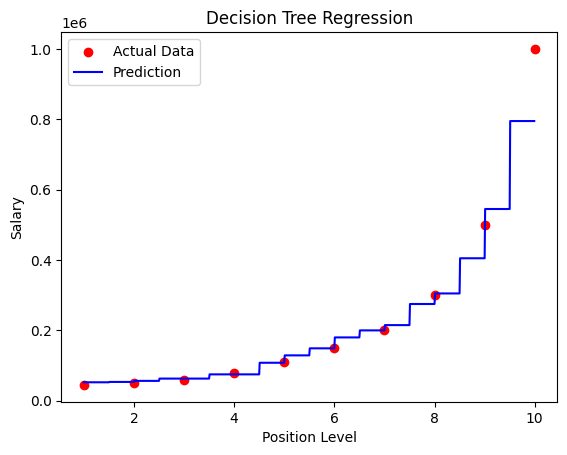

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Create a smooth curve for better visualization
x_grid = np.arange(min(x[:, -1]), max(x[:, -1]), 0.01)  # Taking the 'Level' column
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(x[:, -1], y, color='red', label='Actual Data')  # Plot actual data
plt.plot(x_grid, regressor.predict(np.hstack((np.zeros((len(x_grid), x.shape[1]-1)), x_grid))), color='blue', label='Prediction')  # Predicted line
plt.title('Decision Tree Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()


Evaluate The Performance Of The Model

In [92]:
from sklearn.metrics import r2_score

# Example usage
r2 = r2_score(y_test, y_pred)
print(r2)

0.9107432098765432


In [98]:
# Predict using the model for x_train dataset
y_pred_train = regressor.predict(x_train)
print(y_pred_train)
print(y_train)

[149000.  52500. 275000.  63000. 795000. 108000.  75000. 200000.]
[ 150000   45000  300000   60000 1000000  110000   80000  200000]


In [99]:
from sklearn.metrics import r2_score

# Example usage
r = r2_score(y_train, y_pred_train)
print(r)

0.9392604762898592
